In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import sys
import tensorflow as tf
from google.colab import files

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Загрузка файла

In [ ]:
# Считаем изображение в качестве cv
im = cv2.imread('/content/drive/My Drive/Object detection/hight-st-image.jpg')

In [ ]:
newHeight = 200
newWidth = int(im.shape[1]*200 / im.shape[0]) #пропорциональная высота
im = cv2.resize(im, (newWidth, newHeight)) #парметры к изображению

## Selective search

In [ ]:
#подключаем режим мультипроцессорности
cv2.setUseOptimized(True)
cv2.setNumThreads(8) #позволяет определить количество потоков

In [ ]:
#Selective search segmentation
sss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

# Передаем картинку
sss.setBaseImage(im)

#выбираем метод selective search
sss.switchToSelectiveSearchQuality()

#запускаем selective search на выбранном изображении
rects = sss.process() #результат вернетс в виде прямоугольников, внутри которых будут предположительно находится объекты, которые определит алгоритм
print(rects.shape)

(5422, 4)


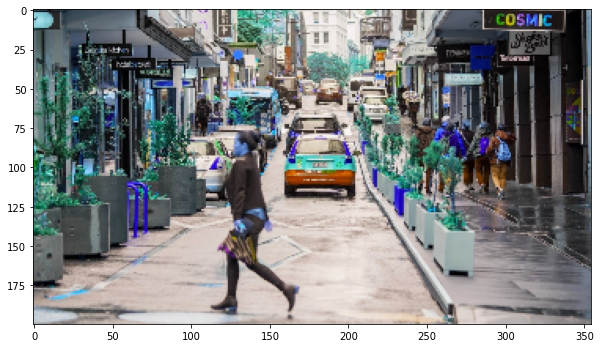

In [ ]:
#выводим исходное изображение
plt.figure(figsize = (10,10))
plt.imshow(im)
plt.show()

## Способы обработки изображения

In [ ]:
numShowRects = 15 #количество прямоугольников, которые будет искать алгоритм (region proposal)
imOut = im.copy()

#Теперь нужно по каждому прямоугольнику и пока не наберется нужное количество, мы должны определять точки вершины с шагом от вершины с шагом от вершины вправо или влево
#по результатам метод должен нарисовать прямоугольник по указанным параметрам. Если количество прямоуголтников превысит заданое, то цикл остановится

for i, rect in enumerate(rects):
  if (i < numShowRects):
    x,y,w,h = rect #x,y,ширина, высота как у прямоугольника.
    cv2.rectangle(imOut, (x,y), (x+w, y+h), (0,255,0), 1, cv2.LINE_AA) #0,255,0 - зеленый цвет
  else:
    break

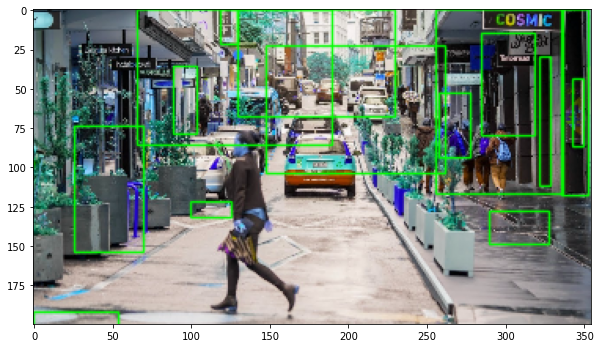

In [ ]:
#визуализация результатов
plt.figure(figsize = (10,10))
plt.imshow(imOut)
plt.show()

##Face Recognition - поиск лиц на фото

In [ ]:
!pip3 install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 24 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=da0c833159ca43be171cdbab3abcd6ef86a84f9796a2a1fc3c969dc798a91ba3
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
import face_recognition #работает только с GPU

In [ ]:
from PIL import Image, ImageDraw, ImageFont
from matplotlib.pyplot import imshow

In [ ]:
## Поиск лиц
image = face_recognition.load_image_file('/content/drive/My Drive/Object detection/3024035_904730.jpg')

In [ ]:
# !pip uninstall dliby
# !pip install dlib==19.18.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.0 MB 38.9 MB/s 


In [ ]:
#распознавание с помощью сверточной нейросети
face_locations = face_recognition.face_locations(image, number_of_times_to_upsample=1, model='cnn')

In [ ]:
#координаты найденых лиц
face_locations

[(281, 1161, 379, 1063),
 (112, 285, 210, 187),
 (341, 1012, 439, 914),
 (351, 236, 449, 137),
 (124, 1006, 206, 924),
 (390, 773, 489, 675),
 (66, 848, 148, 766),
 (351, 405, 449, 307),
 (99, 475, 181, 393),
 (102, 733, 200, 635),
 (233, 636, 351, 518)]

In [ ]:
#сколько найдено лиц
print(len(face_locations))

11


## Выводим найденые лица

In [ ]:
im = cv2.imread('/content/drive/My Drive/Object detection/3024035_904730.jpg')

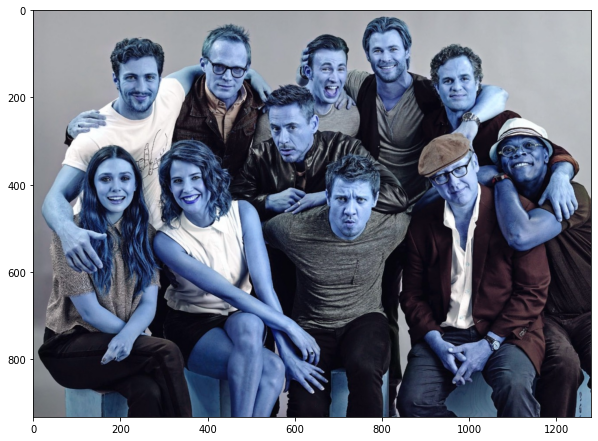

In [ ]:
#выводим исходное изображение
plt.figure(figsize = (10,10))
plt.imshow(im)
plt.show()

Найдено лиц: 11
Лицо распознано в координатах:  281 1161 379 1063


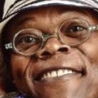

Лицо распознано в координатах:  112 285 210 187


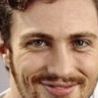

Лицо распознано в координатах:  341 1012 439 914


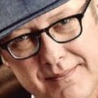

Лицо распознано в координатах:  351 236 449 137


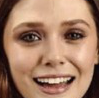

Лицо распознано в координатах:  124 1006 206 924


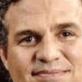

Лицо распознано в координатах:  390 773 489 675


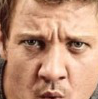

Лицо распознано в координатах:  66 848 148 766


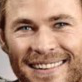

Лицо распознано в координатах:  351 405 449 307


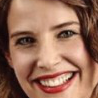

Лицо распознано в координатах:  99 475 181 393


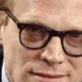

Лицо распознано в координатах:  102 733 200 635


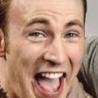

Лицо распознано в координатах:  233 636 351 518


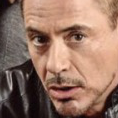

In [ ]:
print('Найдено лиц:', len(face_locations))

#Координаты лиц и их изображений
for face_location in face_locations:

  #координаты каждого изображения
  top, right, bottom, left = face_location
  print('Лицо распознано в координатах: ', top, right, bottom, left)

  #Выводим на печать каждое найденое лицо
  face_image = image[top:bottom, left:right]
  pil_image = Image.fromarray(face_image)
  display(pil_image)

### Поиск персоны

In [ ]:
#создаем переменную с искомой личностью
nick2_image = face_recognition.load_image_file('/content/drive/My Drive/Object detection/rbd345.jpg')


In [ ]:
nick2_face_recognition = face_recognition.face_encodings(nick2_image)[0]

In [ ]:
#список из одного человека(но может быть и больше)
known_face_encodings = [nick2_face_recognition]

#имена для людей, которых ищем
known_face_names = ['Роберт Дауни']

In [ ]:
# from face_recognition.api import load_image_file
# unknown_image = face_recognition.load_image_file

In [ ]:
unknown_image = image

In [ ]:
#Определяем все лица на групповой фотографии
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

In [ ]:
#создаем изображение
pil_image = Image.fromarray(unknown_image)
draw = ImageDraw.Draw(pil_image)

In [ ]:
# from face_recognition.api import face_distance
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):

  matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

  name = 'Неизвестно'

  face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
  best_match_index = np.argmin(face_distances)

  if matches[best_match_index]:
    name = known_face_names[best_match_index]
    print("Найден: ", name)

    #Рисуем квадрат bounding-box

    draw.rectangle(((left, top), (right, bottom)), outline = (0,255,0))

Найден:  Роберт Дауни


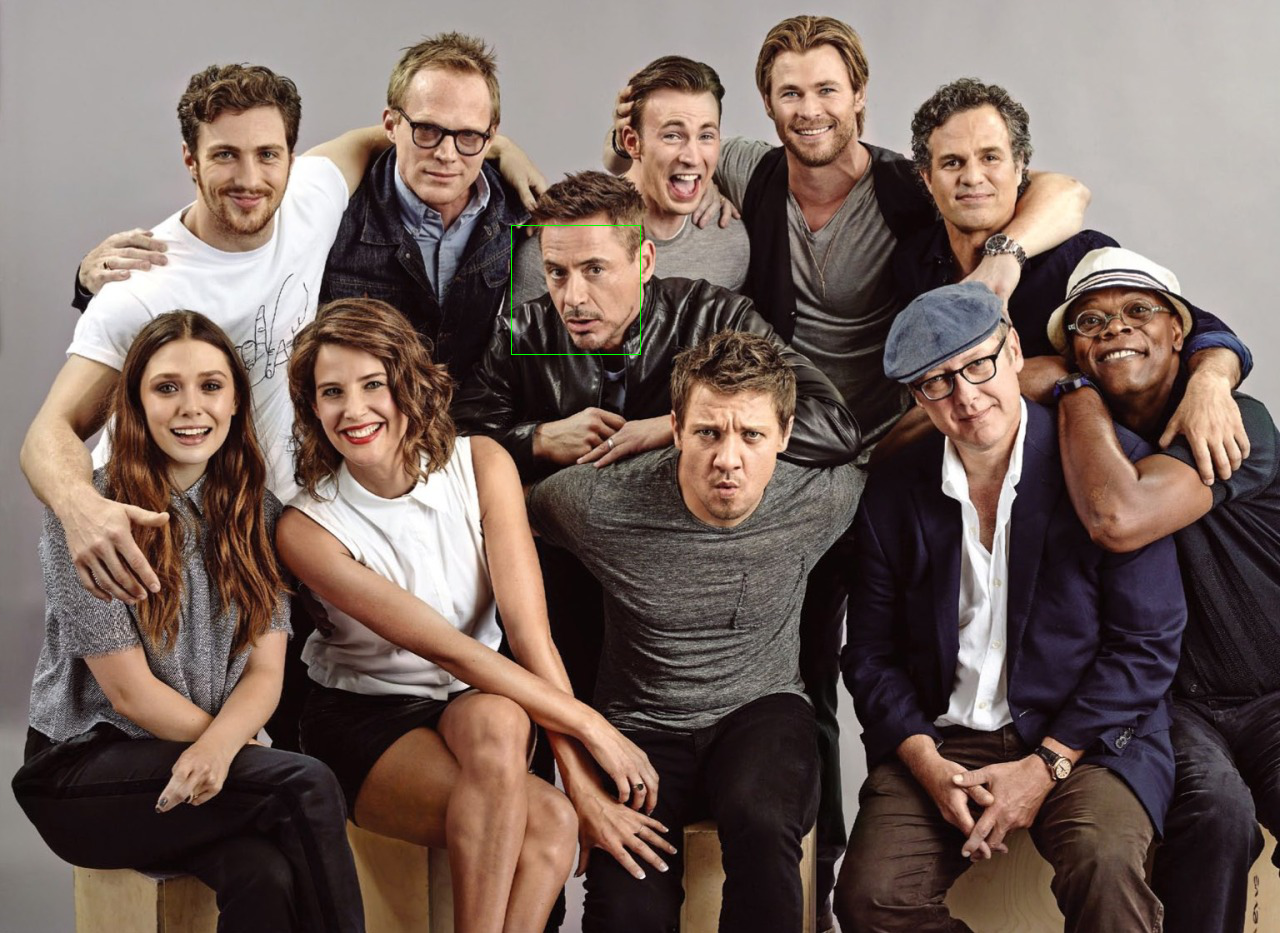

In [ ]:
#визуализация найденных личностей
display(pil_image)

In [ ]:
#сохранение
pil_image.save('robert.jpg')

In [ ]:
!ls

drive  robert.jpg  sample_data


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['draw']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


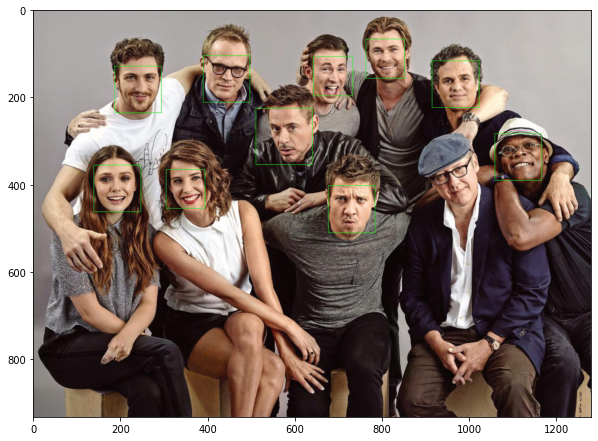

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize = (10,10))
img = mpimg.imread('robert.jpg')
imgplot = plt.imshow(img)
plt.show()